In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import signal as spysig

import simpleDASreader

In [83]:
paths, _, _ = simpleDASreader.find_DAS_files(
    experiment_path='../DAS_Campus_Test/Campus_test_20230628_2kHz',
    start = '20230628 095530',
    duration=180
    )
paths

-- Header info file: 095529.hdf5 --
	Experiment:            Campus_test_20230628
	File timestamp:        2023-06-28 09:55:29
	Type of data:          Phase rate per distance, unit: rad/(s*m)
	Sampling frequency:    2000.00 Hz
	Data shape:            20000 samples x 600 channels
	Gauge length:          2.0 m
	Sensitivities:         9.36e+06 rad/(strain*m)
	Regions of interest:   0:599:1
-----------------------------------


['../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095529.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095539.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095549.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095559.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095609.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095619.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095629.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095639.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095649.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095659.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095709.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095719.hdf5',
 '../DAS_Campus_Test/Campus_test_20230628_2kHz/20230628/dphi/095729.hdf5',
 '../DAS_Campus_Test/Camp

In [84]:
signal = simpleDASreader.load_DAS_files(
    filepaths=paths,
    # chIndex=None,
    # samples=None,
    # integrate=True,
    # unwr=True
).iloc[::-1]
print(signal.shape)

Loaded files ['095529.hdf5', '095539.hdf5', '095549.hdf5', '095559.hdf5', '095609.hdf5', '095619.hdf5', '095629.hdf5', '095639.hdf5', '095649.hdf5', '095659.hdf5', '095709.hdf5', '095719.hdf5', '095729.hdf5', '095739.hdf5', '095749.hdf5', '095759.hdf5', '095809.hdf5', '095819.hdf5', '095829.hdf5']  in 4.5 s
(380000, 600)


In [85]:
def butter_sos_lowcut(data, cutoff_freq, nyq_freq, order=4, axis=-1):
    """
    # Apply lowcut filter to data
    """
    sos = spysig.butter(order, cutoff_freq/nyq_freq, btype='highpass', output='sos')
    y = spysig.sosfilt(sos, data, axis=axis)
    y = pd.DataFrame(y, index=data.index)
    return y

In [86]:
signal_lowcut = butter_sos_lowcut(signal, 1, 0.5/(1/2000), axis=0)
signal_lowcut

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
2023-06-28 09:58:39.155500,-1.869903e-06,1.317048e-06,3.101071e-06,-1.180831e-06,-2.513372e-06,-1.882159e-07,-7.538727e-07,-4.029586e-08,3.581544e-06,-1.860075e-06,...,-5.425502e-06,-5.748102e-06,-6.776912e-06,-7.366022e-06,-7.804243e-06,-7.562442e-06,-5.125635e-06,-4.995704e-06,-5.522032e-06,-2.350230e-06
2023-06-28 09:58:39.155000,-1.854312e-06,1.305257e-06,3.073456e-06,-1.171377e-06,-2.493198e-06,-1.857321e-07,-7.456667e-07,-4.050429e-08,3.550983e-06,-1.846902e-06,...,-5.380923e-06,-5.703050e-06,-6.721377e-06,-7.305372e-06,-7.738777e-06,-7.498282e-06,-5.082978e-06,-4.955131e-06,-5.480414e-06,-2.334531e-06
2023-06-28 09:58:39.154500,-1.843380e-06,1.294618e-06,3.052155e-06,-1.163898e-06,-2.473305e-06,-1.824035e-07,-7.393401e-07,-4.112907e-08,3.522730e-06,-1.829501e-06,...,-5.335807e-06,-5.656098e-06,-6.663375e-06,-7.243713e-06,-7.676283e-06,-7.438428e-06,-5.042356e-06,-4.912767e-06,-5.436535e-06,-2.315706e-06
2023-06-28 09:58:39.154000,-1.836150e-06,1.277550e-06,3.032223e-06,-1.148652e-06,-2.450595e-06,-1.809734e-07,-7.346380e-07,-4.248629e-08,3.489436e-06,-1.819889e-06,...,-5.291419e-06,-5.609239e-06,-6.609275e-06,-7.182953e-06,-7.612481e-06,-7.377654e-06,-5.000617e-06,-4.873658e-06,-5.389876e-06,-2.293602e-06
2023-06-28 09:58:39.153500,-1.815416e-06,1.275698e-06,3.005561e-06,-1.147152e-06,-2.433760e-06,-1.771522e-07,-7.258953e-07,-4.167404e-08,3.464365e-06,-1.799908e-06,...,-5.246017e-06,-5.561635e-06,-6.552679e-06,-7.124963e-06,-7.549603e-06,-7.315090e-06,-4.960887e-06,-4.831129e-06,-5.344395e-06,-2.277512e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 09:55:29.158000,1.846845e-08,1.519317e-08,-1.110877e-08,-1.304892e-08,1.741793e-09,7.134305e-09,9.883982e-11,2.510011e-09,2.707016e-09,2.377491e-09,...,-1.294123e-08,1.971118e-08,-2.258722e-09,-1.350492e-08,-9.665676e-09,-1.291767e-08,1.963447e-08,2.965641e-08,-1.323535e-08,-2.046683e-08
2023-06-28 09:55:29.157500,1.037833e-08,1.299731e-08,-1.695380e-09,-1.064308e-08,-1.540705e-09,5.188183e-09,4.534892e-10,1.628151e-09,2.156570e-09,1.985027e-09,...,-1.062979e-08,2.150401e-08,-7.191200e-09,-1.517896e-08,-5.917719e-09,-1.244261e-08,1.988342e-08,3.126592e-08,-1.035537e-08,-2.230236e-08
2023-06-28 09:55:29.157000,1.507609e-08,1.545250e-08,-3.942552e-09,-6.978469e-09,5.161990e-10,6.016544e-10,-3.109228e-09,6.735614e-10,4.326703e-09,5.470224e-09,...,-9.315642e-09,2.010618e-08,-7.329983e-09,-1.452221e-08,-5.894689e-09,-1.259014e-08,1.867175e-08,2.756880e-08,-1.257165e-08,-1.809086e-08
2023-06-28 09:55:29.156500,1.438262e-08,1.355333e-08,-4.873111e-09,-1.031382e-08,1.178256e-09,4.820287e-09,-3.467203e-09,-1.471548e-09,2.864064e-09,5.231977e-09,...,-1.598079e-08,1.780064e-08,1.599634e-09,-1.025557e-08,-1.032506e-08,-1.175741e-08,1.834813e-08,2.541894e-08,-1.454994e-08,-1.852685e-08


In [87]:
# vmin = np.quantile(signal_lowcut, 0.001)
# vmax= np.quantile(signal_lowcut, 0.999)
vmin = -5e-8
vmax = 5e-8
print(vmin)
print(vmax)

-5e-08
5e-08


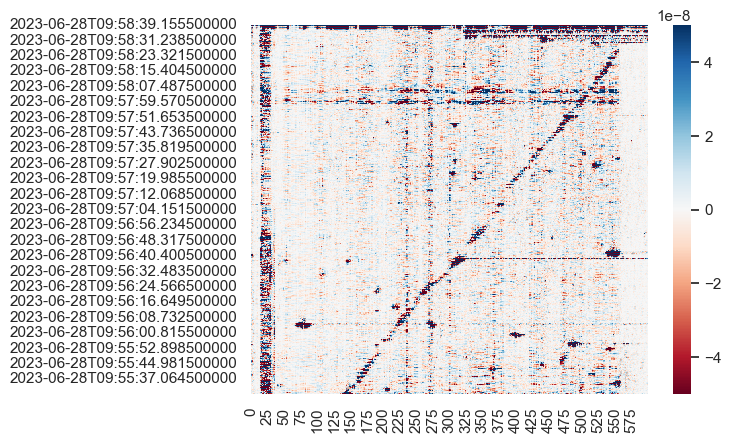

In [88]:
sns.heatmap(signal_lowcut, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

In [89]:
def butter_sos_highcut(data, cutoff_freq, nyq_freq, order=4, axis=-1):
    """
    # Apply highcut filter to data
    """
    sos = spysig.butter(order, cutoff_freq/nyq_freq, btype='lowpass', output='sos')
    y = spysig.sosfilt(sos, data, axis=axis)
    y = pd.DataFrame(y, index=data.index)
    return y

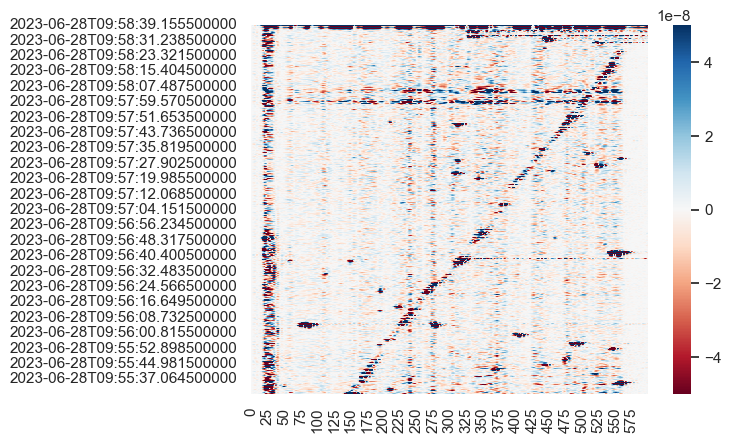

In [90]:
signal_highcut = butter_sos_highcut(signal_lowcut, cutoff_freq=200, nyq_freq=0.5/(1/2000))
sns.heatmap(signal_highcut, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

In [91]:
def decimate(data, dt, dt_out, axis=-1, padtype='line'):
    """
    Resample a seismic trace to coarser time sampling interval
    
    # Resample to a coarser grid
    # dt time interval can be in any unit, 
    #   but dt_in and dt_out must be in the same unit.
    """
    y = spysig.resample_poly(data, int(dt*1e6), int(dt_out*1e6),
                             axis=axis, padtype=padtype)
    idx = slice(0, len(data.index), int(dt_out/dt))
    idx = data.index[idx]
    y = pd.DataFrame(y, index=idx)
    return y

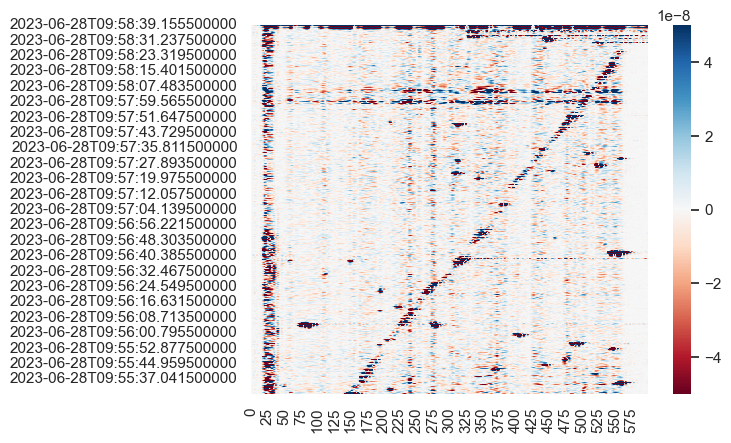

In [92]:
signal_sample = decimate(signal_highcut, dt=1/2000, dt_out=1/2000*4, axis=0)
sns.heatmap(signal_sample, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);